In [40]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [3]:
DATA_PATH = "hands_on_datasets/Advertising.csv"
data = pd.read_csv(DATA_PATH,index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [14]:
def scatter_plot_by_feature(data_cols):
    plt.figure(figsize=(6,6))
    for x_col in data_cols:
        plt.scatter(data[x_col],data["sales"],label = f"{x_col}")
        plt.xlabel(f"Advertising on {x_col}")
        plt.ylabel("Sales k$")
        plt.legend(loc ="lower right")
    plt.show()

        

In [15]:
d_cols = data.columns.drop("sales")
d_cols = d_cols.to_numpy()

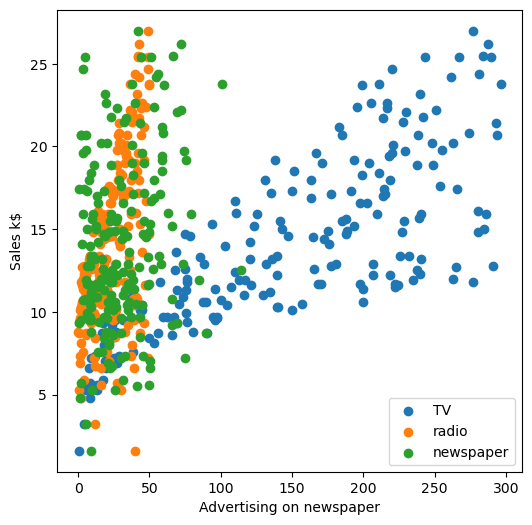

In [16]:
scatter_plot_by_feature(d_cols)

## Base Model

In [18]:
X = data.drop(["sales"],axis = 1)
y = data["sales"].values.reshape(-1,1)

## KFold Cross Validation

In [25]:
lr = LinearRegression()
mses = cross_val_score(lr,X,y,scoring="neg_mean_squared_error",cv=5)
mean_mse = np.mean(mses)
print(-mean_mse)

3.072946597100209


## Ridge Regression

In [41]:
ridge = Ridge()
r_params = {"alpha":[1e-20,1e-10, 1e-5,1e-2,1,5,10,20,100,500,1000]}
grid_estimator = GridSearchCV(ridge,r_params,scoring="neg_mean_squared_error",cv=5)
grid_estimator.fit(X,y)
print(f"Best param:{grid_estimator.best_params_}")
print(f"Best Error:{-grid_estimator.best_score_}")

Best param:{'alpha': 1000}
Best Error:3.066939827893271


## Lasso

In [49]:
lasso = Lasso(tol = 0.05)
l_params = {"alpha":[1e-20,1e-10, 1e-5,1e-2,1,5,10,20,100,500,1000]}
grid_l_estimator = GridSearchCV(lasso,l_params,scoring="neg_mean_squared_error",cv=5)
grid_l_estimator.fit(X,y)
print(f"Best param:{grid_l_estimator.best_params_}")
print(f"Best Error:{-grid_l_estimator.best_score_}")


/Users/yakupcanergen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.312e+02, tolerance: 2.109e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/yakupcanergen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.484e+02, tolerance: 2.251e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of 

Best param:{'alpha': 1}
Best Error:3.0359983209111925
